In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pwd

'C:\\Users\\BRADLEY\\Downloads\\Data Science'

In [3]:
new='aapl.csv'
df=pd.read_csv(new)
df.head()

,Unnamed: 0,adj_close,close,date,high,low,open,volume
0,0,31.68,130.31,2000-03-01,132.06,118.50,118.56,38478000
1,1,29.66,122.00,2000-03-02,127.94,120.69,127.00,11136800
2,2,31.12,128.00,2000-03-03,128.23,120.00,124.87,11565200
3,3,30.56,125.69,2000-03-06,129.13,125.00,126.00,7520000
4,4,29.87,122.87,2000-03-07,127.44,121.12,126.44,9767600


In [4]:
df.corr()

,Unnamed: 0,adj_close,close,high,low,open,volume
Unnamed: 0,1.000000,0.857623,0.832001,0.831732,0.832029,0.831833,0.205899
adj_close,0.857623,1.000000,0.996564,0.996325,0.996577,0.996358,0.036967
close,0.832001,0.996564,1.000000,0.999893,0.999882,0.999768,0.024636
high,0.831732,0.996325,0.999893,1.000000,0.999840,0.999912,0.028510
low,0.832029,0.996577,0.999882,0.999840,1.000000,0.999865,0.020534
open,0.831833,0.996358,0.999768,0.999912,0.999865,1.000000,0.025638
volume,0.205899,0.036967,0.024636,0.028510,0.020534,0.025638,1.000000


In [5]:
df.columns

Index(['Unnamed: 0', 'adj_close', 'close', 'date', 'high', 'low', 'open',
       'volume'],
      dtype='object')

In [6]:
df.drop(axis=1,columns=['Unnamed: 0'],inplace=True)

<b>removing the unnamed column</b>

In [7]:
df.head(5)

,adj_close,close,date,high,low,open,volume
0,31.68,130.31,2000-03-01,132.06,118.50,118.56,38478000
1,29.66,122.00,2000-03-02,127.94,120.69,127.00,11136800
2,31.12,128.00,2000-03-03,128.23,120.00,124.87,11565200
3,30.56,125.69,2000-03-06,129.13,125.00,126.00,7520000
4,29.87,122.87,2000-03-07,127.44,121.12,126.44,9767600


In [8]:
df.isna().sum()

adj_close    0
close        0
date         0
high         0
low          0
open         0
volume       0
dtype: int64

<b>No null values present</b>

In [9]:
df.dtypes

adj_close    float64
close        float64
date          object
high         float64
low          float64
open         float64
volume         int64
dtype: object

<b>The datatypes are also okay</b>

In [10]:
df.describe()

,adj_close,close,high,low,open,volume
count,3270.000000,3270.000000,3270.000000,3270.000000,3270.000000,3.270000e+03
mean,140.505248,151.108138,153.017789,149.103336,151.216673,2.151112e+07
std,165.408965,165.277867,166.815882,163.681717,165.485538,1.482164e+07
min,6.380000,13.120000,13.190000,12.720000,12.990000,1.405000e+06
25%,12.020000,24.712500,25.060000,24.092500,24.592500,1.159570e+07
50%,72.410000,85.340000,86.500000,84.355000,85.415000,1.730015e+07
75%,192.572500,198.010000,200.762500,196.027500,198.957500,2.744490e+07
max,685.760000,702.100000,705.070000,699.570000,702.410000,2.650690e+08


In [11]:
df.index

RangeIndex(start=0, stop=3270, step=1)

In [12]:
df['date'].describe()

count           3270
unique          3270
top       2008-06-25
freq               1
Name: date, dtype: object

<b>The format is wrong hence the values don't make sense hence we convert it to date time format</b>

In [13]:
df['date'].head()

0    2000-03-01
1    2000-03-02
2    2000-03-03
3    2000-03-06
4    2000-03-07
Name: date, dtype: object

<b>using the pd.to_datetime which takes the format mm/dd/yy</b>

In [14]:
df['date']=pd.to_datetime(df['date'],yearfirst=True)

<b>using yearfirst instead of date first since the dates have year first</b>

In [15]:
df['date']

0      2000-03-01
1      2000-03-02
2      2000-03-03
3      2000-03-06
4      2000-03-07
          ...    
3265   2013-02-25
3266   2013-02-26
3267   2013-02-27
3268   2013-02-28
3269   2013-03-01
Name: date, Length: 3270, dtype: datetime64[ns]

In [16]:
df.describe(include='all')

<ipython-input-16-174ba9bf1a5c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,adj_close,close,date,high,low,open,volume
count,3270.000000,3270.000000,3270,3270.000000,3270.000000,3270.000000,3.270000e+03
unique,NaN,NaN,3270,NaN,NaN,NaN,NaN
top,NaN,NaN,2007-09-10 00:00:00,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,NaN,NaN,NaN,NaN
first,NaN,NaN,2000-03-01 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,2013-03-01 00:00:00,NaN,NaN,NaN,NaN
mean,140.505248,151.108138,NaN,153.017789,149.103336,151.216673,2.151112e+07
std,165.408965,165.277867,NaN,166.815882,163.681717,165.485538,1.482164e+07
min,6.380000,13.120000,NaN,13.190000,12.720000,12.990000,1.405000e+06
25%,12.020000,24.712500,NaN,25.060000,24.092500,24.592500,1.159570e+07


In [17]:
df['date'].describe()

<ipython-input-17-07e98f8ab9f6>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['date'].describe()


count                    3270
unique                   3270
top       2007-09-10 00:00:00
freq                        1
first     2000-03-01 00:00:00
last      2013-03-01 00:00:00
Name: date, dtype: object

<b>Indexing the date column</b>

In [18]:
date_df=df.copy()
date_df.info

<bound method DataFrame.info of       adj_close   close       date    high     low    open    volume
0         31.68  130.31 2000-03-01  132.06  118.50  118.56  38478000
1         29.66  122.00 2000-03-02  127.94  120.69  127.00  11136800
2         31.12  128.00 2000-03-03  128.23  120.00  124.87  11565200
3         30.56  125.69 2000-03-06  129.13  125.00  126.00   7520000
4         29.87  122.87 2000-03-07  127.44  121.12  126.44   9767600
...         ...     ...        ...     ...     ...     ...       ...
3265     437.00  442.80 2013-02-25  455.12  442.57  453.85  13306400
3266     443.09  448.97 2013-02-26  451.54  437.66  443.82  17910700
3267     438.75  444.57 2013-02-27  452.44  440.65  448.43  20976800
3268     435.62  441.40 2013-02-28  447.87  441.40  444.05  11518400
3269     424.83  430.47 2013-03-01  438.18  429.98  438.00  19730300

[3270 rows x 7 columns]>

In [19]:
date_df.set_index('date',inplace=True,verify_integrity=True)

In [20]:
date_df.index

DatetimeIndex(['2000-03-01', '2000-03-02', '2000-03-03', '2000-03-06',
               '2000-03-07', '2000-03-08', '2000-03-09', '2000-03-10',
               '2000-03-13', '2000-03-14',
               ...
               '2013-02-15', '2013-02-19', '2013-02-20', '2013-02-21',
               '2013-02-22', '2013-02-25', '2013-02-26', '2013-02-27',
               '2013-02-28', '2013-03-01'],
              dtype='datetime64[ns]', name='date', length=3270, freq=None)

<b>setting the frequency</b></br>

In [21]:
day_df=date_df.asfreq('d')
day_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4749 entries, 2000-03-01 to 2013-03-01
Freq: D
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   adj_close  3270 non-null   float64
 1   close      3270 non-null   float64
 2   high       3270 non-null   float64
 3   low        3270 non-null   float64
 4   open       3270 non-null   float64
 5   volume     3270 non-null   float64
dtypes: float64(6)
memory usage: 259.7 KB


In [22]:
day_df.head(5)

,adj_close,close,high,low,open,volume
date,,,,,,
2000-03-01,31.68,130.31,132.06,118.50,118.56,38478000.0
2000-03-02,29.66,122.00,127.94,120.69,127.00,11136800.0
2000-03-03,31.12,128.00,128.23,120.00,124.87,11565200.0
2000-03-04,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-05,NaN,NaN,NaN,NaN,NaN,NaN


<b>setting the frequency creates null values and we solve this by accounting for the business days </b></br>
<b>we know stocks do not trade on weekends</b>

In [23]:
day_df=day_df.asfreq('b')
day_df.head(5)

,adj_close,close,high,low,open,volume
date,,,,,,
2000-03-01,31.68,130.31,132.06,118.50,118.56,38478000.0
2000-03-02,29.66,122.00,127.94,120.69,127.00,11136800.0
2000-03-03,31.12,128.00,128.23,120.00,124.87,11565200.0
2000-03-06,30.56,125.69,129.13,125.00,126.00,7520000.0
2000-03-07,29.87,122.87,127.44,121.12,126.44,9767600.0


<b>plotting using the mothly volume trading values</b>

In [24]:
month_df=pd.DataFrame(data=day_df,index=day_df.index,columns=['volume'])

In [25]:
month_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3393 entries, 2000-03-01 to 2013-03-01
Freq: B
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   volume  3270 non-null   float64
dtypes: float64(1)
memory usage: 53.0 KB


<b>setting the frequency to be monthly</b>

In [26]:
month_df=month_df.asfreq('m')

In [27]:
month_df.isna().sum()

volume    45
dtype: int64

In [28]:
month_df.fillna(method='ffill',inplace=True)

In [29]:
month_df.isna().sum()

volume    0
dtype: int64

Text(0, 0.5, 'Volume ')

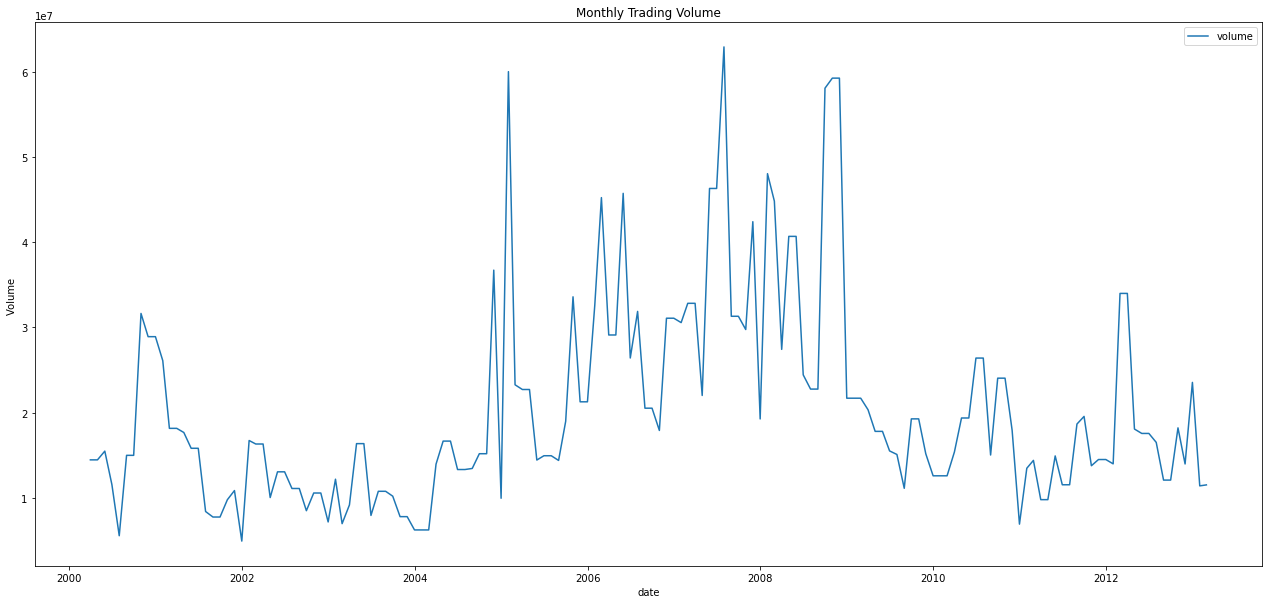

In [30]:
plt.figure(figsize=(22,10))
sns.lineplot(data=month_df)
plt.title('Monthly Trading Volume')
plt.ylabel('Volume ')

<b>creating a new data frame for the high and low values</b>

In [31]:
month_df=pd.DataFrame(data=day_df,index=day_df.index,columns=['high','low'])

In [32]:
month_df.head()

,high,low
date,,
2000-03-01,132.06,118.50
2000-03-02,127.94,120.69
2000-03-03,128.23,120.00
2000-03-06,129.13,125.00
2000-03-07,127.44,121.12


In [33]:
month_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3393 entries, 2000-03-01 to 2013-03-01
Freq: B
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   high    3270 non-null   float64
 1   low     3270 non-null   float64
dtypes: float64(2)
memory usage: 239.5 KB


<b>checking for null values</b>

In [34]:
month_df.isna().sum()

high    123
low     123
dtype: int64

<b>removing null values</b>

In [35]:
month_df.fillna(method='bfill',inplace=True)

In [36]:
month_df.isna().sum()

high    0
low     0
dtype: int64

<b>setting the frequency to be monthly</b>

In [37]:
month_df=month_df.asfreq('m')

<AxesSubplot:title={'center':'Highs and Lows'}, xlabel='date', ylabel='Values'>

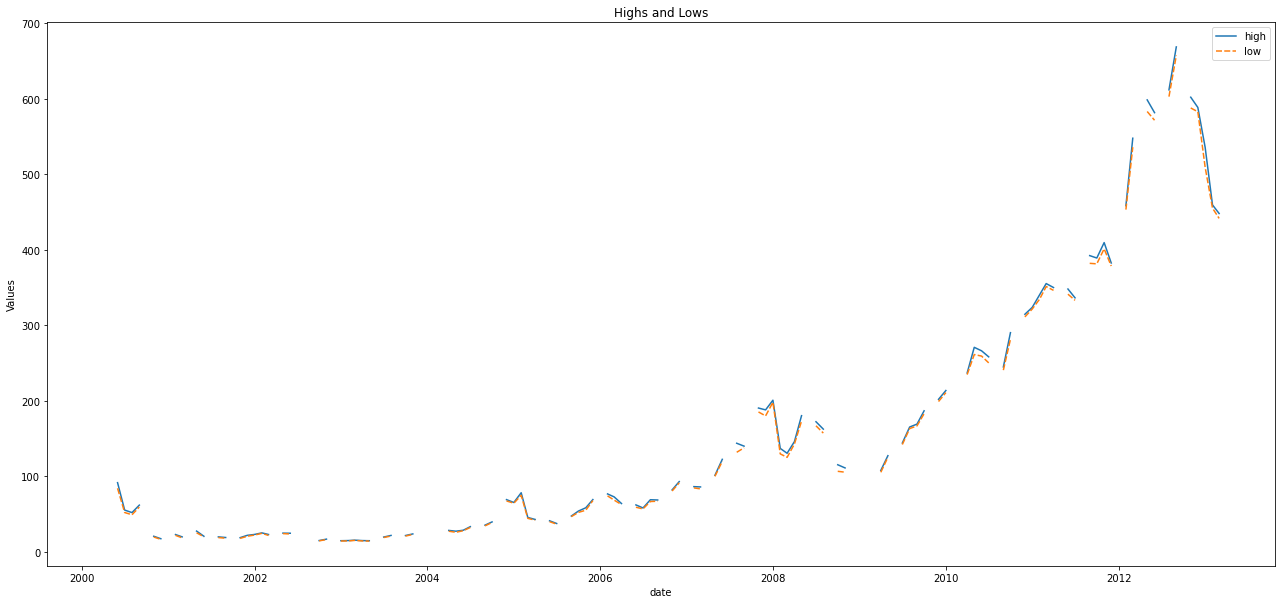

In [38]:
plt.figure(figsize=(22,10))
plt.title('Highs and Lows')
plt.ylabel('Values')
sns.lineplot(data=month_df)

<b>they generally follow the same trend</b>

<b>Trying to predict the close price</b>

<b>creating dataframe with date and the target variable</b>

In [39]:
month_df=pd.DataFrame(data=day_df,index=day_df.index,columns=['close'])

In [40]:
month_df=month_df.asfreq('m')

In [41]:
month_df.isna().sum()

close    45
dtype: int64

In [42]:
month_df.fillna(method='ffill',inplace=True)

In [43]:
month_df.isna().sum()

close    0
dtype: int64

<AxesSubplot:title={'center':'Closing Price Trend'}, xlabel='date', ylabel='Values'>

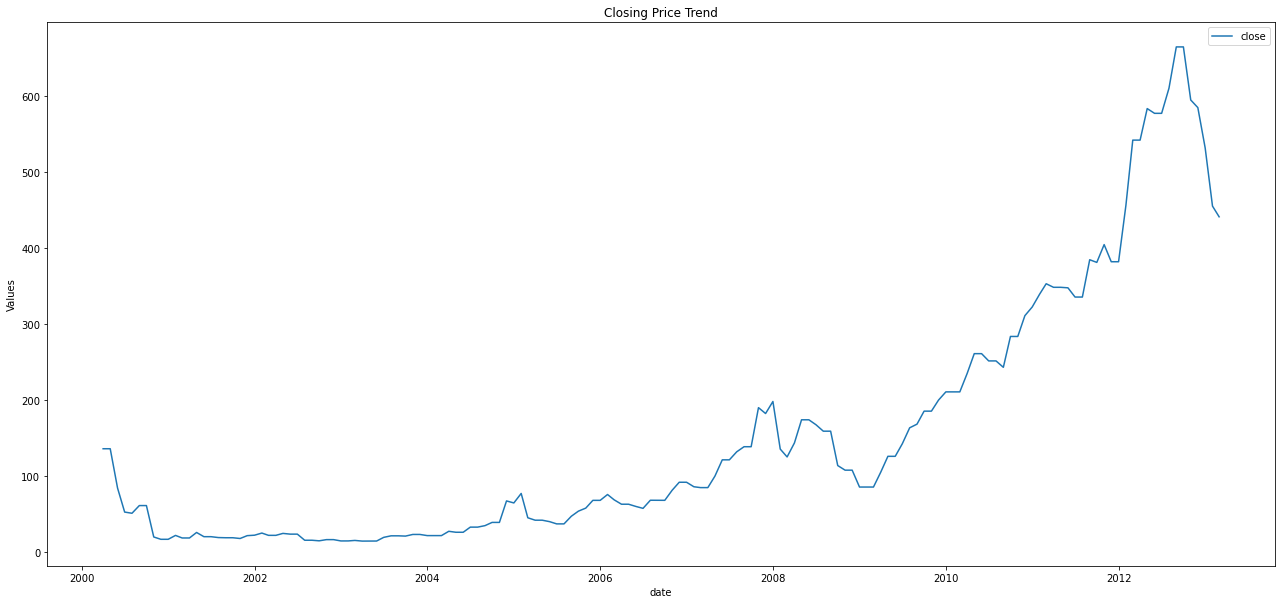

In [44]:
plt.figure(figsize=(22,10))
plt.title('Closing Price Trend')
plt.ylabel('Values')
sns.lineplot(data=month_df)

<b>Machine Learning</b>

<p>training and testing using 80:20 ratio</p>

In [45]:
size= int(len(month_df)*0.8)
size

124

In [46]:
month_df_train = month_df.iloc[:size]


In [47]:
month_df_test = month_df.iloc[size:]

In [48]:
month_df_train.tail(5)

,close
date,
2010-02-28,210.73
2010-03-31,235.00
2010-04-30,261.09
2010-05-31,261.09
2010-06-30,251.53


In [49]:
month_df_test.head(5)

,close
date,
2010-07-31,251.53
2010-08-31,243.10
2010-09-30,283.75
2010-10-31,283.75
2010-11-30,311.15


In [50]:
!pip install pmdarima

In [51]:
from pmdarima.arima import auto_arima

<b>Computing the percentage change</b>

In [52]:
month_df['ret_close'] = month_df['close'].pct_change(1)*100
month_df

,close,ret_close
date,,
2000-03-31,135.81,NaN
2000-04-30,135.81,0.000000
2000-05-31,84.00,-38.148884
2000-06-30,52.38,-37.642857
2000-07-31,50.81,-2.997327
...,...,...
2012-10-31,595.32,-10.510492
2012-11-30,585.28,-1.686488
2012-12-31,532.17,-9.074289


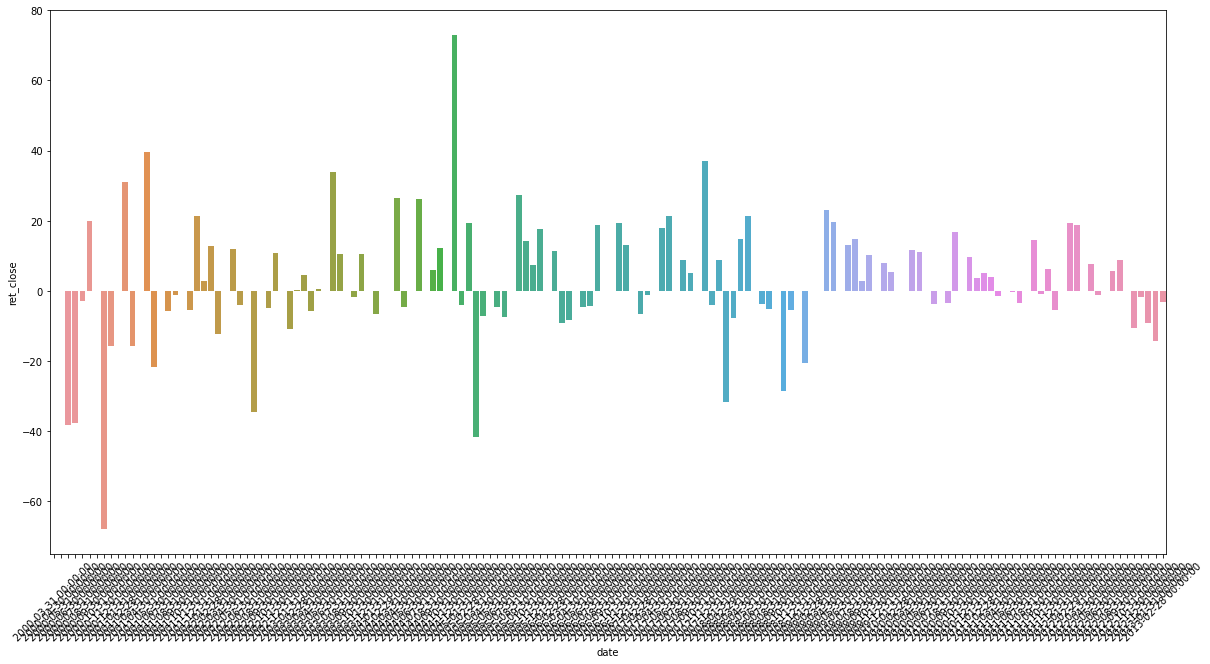

In [53]:
plt.figure(figsize=(20, 10))
sns.barplot(x = month_df.index, y = month_df['ret_close'], data = month_df)
#plt.xlabel('Date', rot=0.45)
plt.xticks(rotation=45)
plt.show()

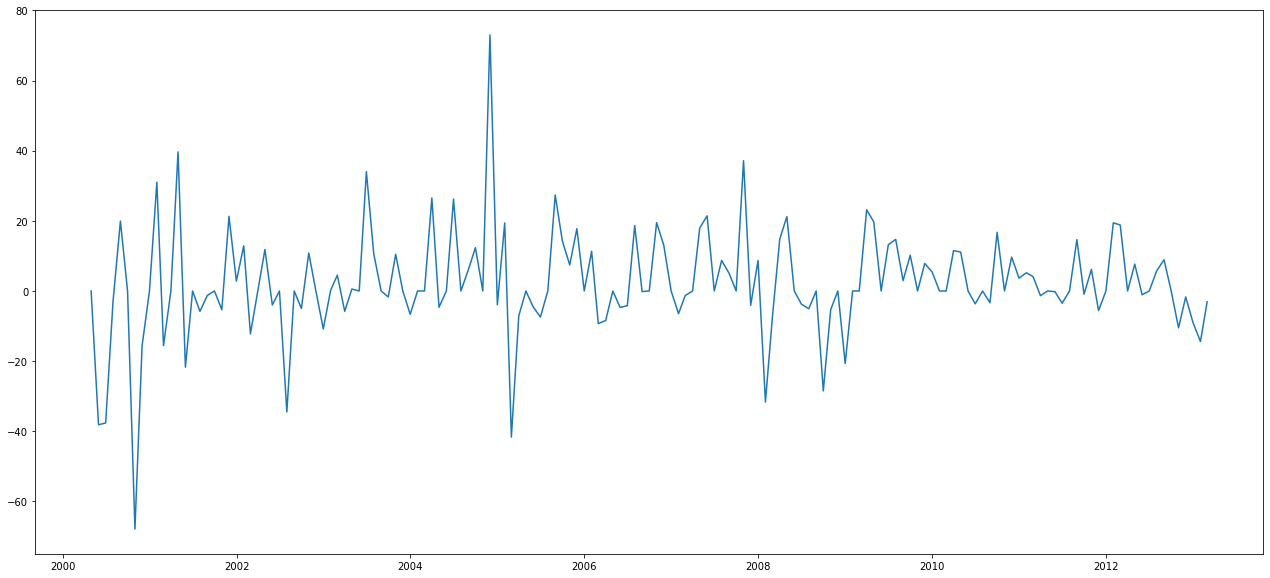

In [54]:
plt.figure(figsize=(22,10))
plt.plot(month_df['ret_close'])

<b>fitting a model</b>

In [55]:
model_auto = auto_arima(month_df.close[1:])

In [56]:
model_auto

ARIMA(order=(1, 1, 0), scoring_args={}, with_intercept=False)

In [57]:
from fbprophet import Prophet

In [58]:
month_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 156 entries, 2000-03-31 to 2013-02-28
Freq: M
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   close      156 non-null    float64
 1   ret_close  155 non-null    float64
dtypes: float64(2)
memory usage: 3.7 KB


In [59]:
close_df =df[['date','close']]
close_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3270 entries, 0 to 3269
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3270 non-null   datetime64[ns]
 1   close   3270 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 51.2 KB


In [60]:
close_df = pd.DataFrame(data=df, index=df.index, columns = ['date','close'] )
close_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3270 entries, 0 to 3269
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3270 non-null   datetime64[ns]
 1   close   3270 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 51.2 KB


In [61]:
close_df.rename(columns={'date':'ds', 'close':'y'}, inplace=True)
close_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3270 entries, 0 to 3269
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      3270 non-null   datetime64[ns]
 1   y       3270 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 51.2 KB


In [62]:
model = Prophet()
model.fit(close_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [63]:
future = model.make_future_dataframe(periods=365)#predict for another 365 days
future.tail()

,ds
3630,2014-02-25
3631,2014-02-26
3632,2014-02-27
3633,2014-02-28
3634,2014-03-01


In [64]:
# Python
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3630,2014-02-25,749.183646,702.331581,795.388667
3631,2014-02-26,749.694005,705.472018,793.602743
3632,2014-02-27,750.439526,698.579541,797.513679
3633,2014-02-28,750.542423,701.038904,798.302716
3634,2014-03-01,765.131892,717.643694,810.987556


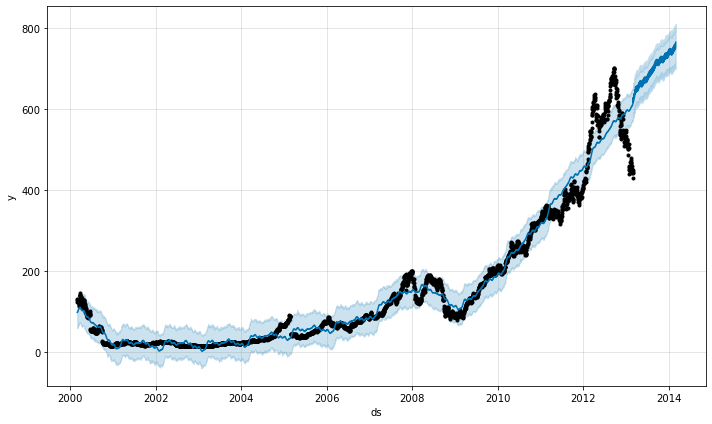

In [65]:
fig1 = model.plot(forecast)

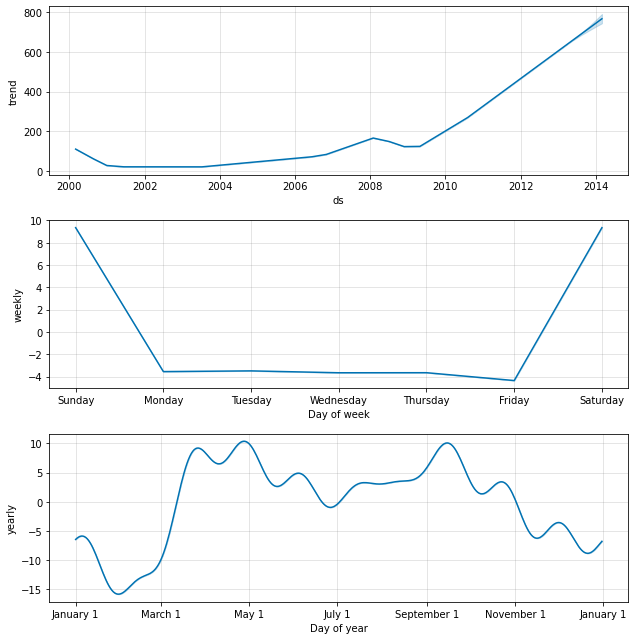

In [66]:
fig2 = model.plot_components(forecast)

### ANNUAL PERCENTAGE CHANGE

In [67]:
#annualdf = pd.DataFrame(day_df.resample() )

In [68]:
annual_df=pd.DataFrame(data=day_df,index=day_df.index,columns=['close'])

In [69]:
annual_df

,close
date,
2000-03-01,130.31
2000-03-02,122.00
2000-03-03,128.00
2000-03-06,125.69
2000-03-07,122.87
...,...
2013-02-25,442.80
2013-02-26,448.97
2013-02-27,444.57


In [70]:
annual_df = annual_df.asfreq('y')

In [71]:
annual_df

,close
date,
2000-12-31,NaN
2001-12-31,21.90
2002-12-31,14.33
2003-12-31,21.37
2004-12-31,64.40
2005-12-31,NaN
2006-12-31,NaN
2007-12-31,198.08
2008-12-31,85.35


In [72]:
annual_df.fillna(method='bfill', inplace=True)

In [73]:
annual_df['ret_close'] = annual_df['close'].pct_change(1)*100
annual_df

,close,ret_close
date,,
2000-12-31,21.90,NaN
2001-12-31,21.90,0.000000
2002-12-31,14.33,-34.566210
2003-12-31,21.37,49.127704
2004-12-31,64.40,201.357043
2005-12-31,198.08,207.577640
2006-12-31,198.08,0.000000
2007-12-31,198.08,0.000000
2008-12-31,85.35,-56.911349


In [74]:
annual_df.fillna(method='bfill')

,close,ret_close
date,,
2000-12-31,21.90,0.000000
2001-12-31,21.90,0.000000
2002-12-31,14.33,-34.566210
2003-12-31,21.37,49.127704
2004-12-31,64.40,201.357043
2005-12-31,198.08,207.577640
2006-12-31,198.08,0.000000
2007-12-31,198.08,0.000000
2008-12-31,85.35,-56.911349


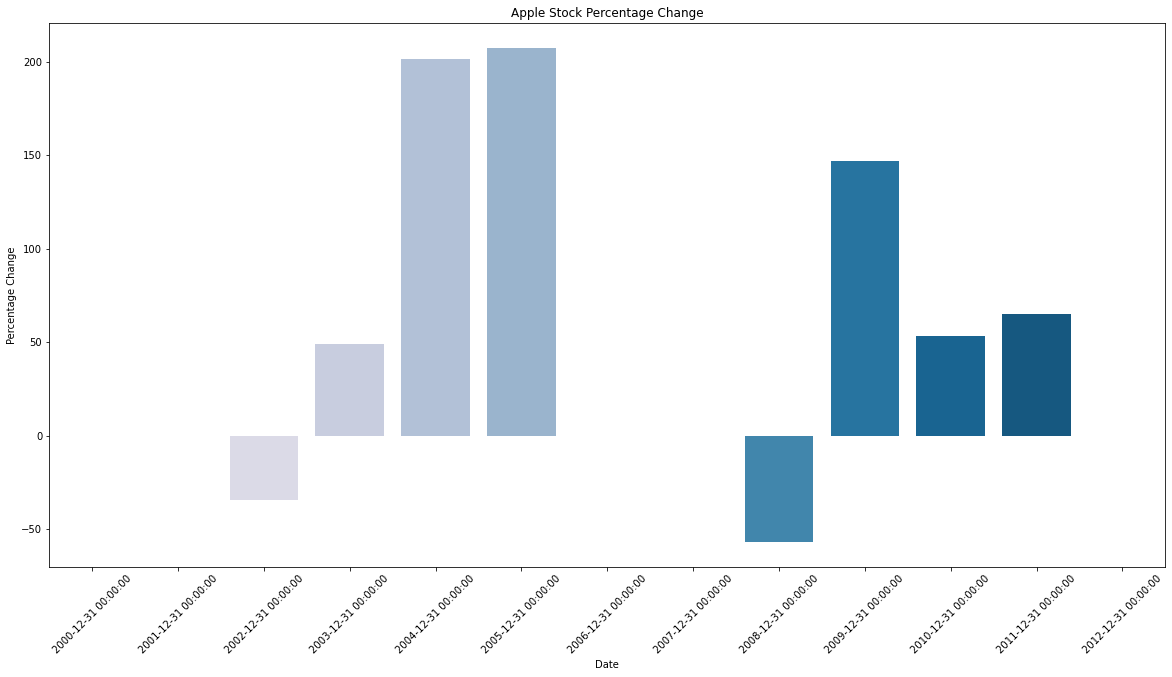

In [75]:
plt.figure(figsize=(20, 10))
sns.barplot(x = annual_df.index, y = annual_df['ret_close'], data = annual_df, palette="PuBu")
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel("Percentage Change")
plt.title("Apple Stock Percentage Change")
plt.show()

The plot above shows ** ANNUAL PERCENTAGE CHANGE** in Apple stock. The bars below zero show a negative percentage change<br>
while it shows the percentage change it isn't fully accurate where there were Nans generated and we filled if bfill and ffill.<br>
We need to consult with a financial expert to understand how the calculate percentage change in annual stock to see how to implement it in code<br>